In [7]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
from neuralprophet import NeuralProphet

#data = pd.read_csv('./data/seattleWeather_1948-2017.csv')

In [8]:
%matplotlib inline

In [4]:
STOCK_CODE = 'KS200'
data = fdr.DataReader(STOCK_CODE)

Text(0.5, 1.0, 'S&P 500 Prices')

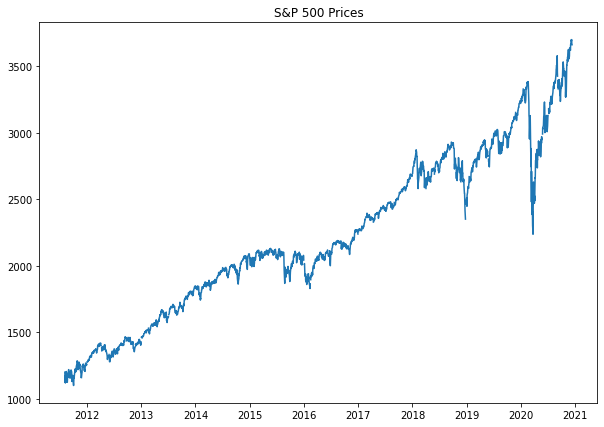

In [9]:
start = datetime(2010, 12, 13)
end = datetime(2020, 12, 11)

sp500_data = pdr.get_data_fred('sp500', start, end)

plt.figure(figsize=(10, 7))
plt.plot(sp500_data)
plt.title('S&P 500 Prices')

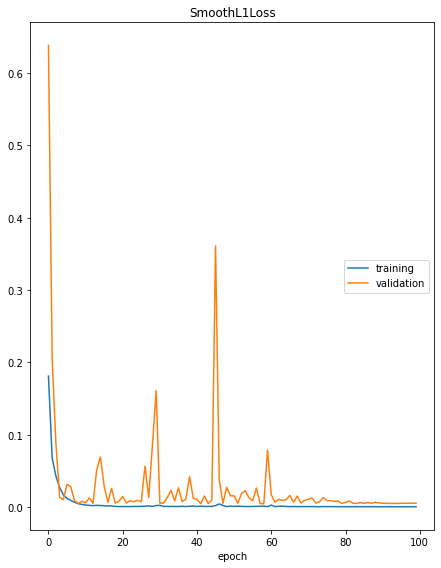

Epoch[100/100]: 100%|██████████| 100/100 [00:17<00:00,  5.67it/s, SmoothL1Loss=0.000586, MAE=44.5, RegLoss=0.000562, MAE_val=145, SmoothL1Loss_val=0.00541]


In [10]:
sp500_data = sp500_data.reset_index().rename(columns={'DATE': 'ds', 'sp500': 'y'}) # the usual preprocessing routine

model = NeuralProphet(n_changepoints=100,
                     trend_reg=0.05,
                     yearly_seasonality=False,
                     weekly_seasonality=False,
                     daily_seasonality=False)
metrics = model.fit(sp500_data, validate_each_epoch=True,
                   valid_p=0.2, freq='D',
                   plot_live_loss=True,
                   epochs=100)

In [12]:
plot_forecast(model, sp500_data, periods=60)

NameError: name 'plot_forecast' is not defined